## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import yfinance as yf
from LSTMpredictor import *
from loaddata import *

Using TensorFlow backend.
/home/hendrykn123/.local/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Load Dataset from Yahoo Finance

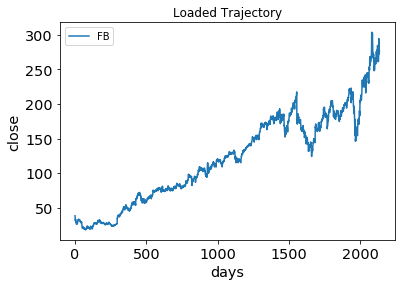

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.05,45.00,38.00,38.23,573576400,0,0
1,2012-05-21,36.53,36.66,33.00,34.03,168192700,0,0
2,2012-05-22,32.61,33.59,30.94,31.00,101786600,0,0
3,2012-05-23,31.37,32.50,31.36,32.00,73600000,0,0
4,2012-05-24,32.95,33.21,31.77,33.03,50237200,0,0


In [2]:
trj = loaddata_yahoo('FB', interval = 'daily', start_date = '1985-01-01', verbose_plot = True)
trj.head()

## Build and Fit LSTM
Note that this is a very simple model, the results won't be accurate

/home/hendrykn123/Documents/Master_Thesis/Tools/LSTMpredictor/LSTMpredictor.py:125: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(100, 1), return_sequences=True, units=100)`
  model.add(LSTM(input_shape = (self.n_prev,1), output_dim= self.n_prev, return_sequences = True))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 64)           42240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6401      
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

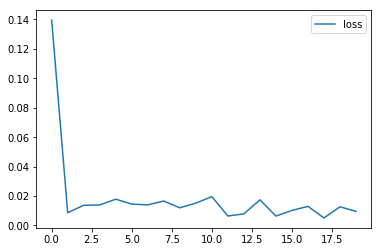

In [3]:
lp = LSTMpredictor(interval = "daily", n_prev = 100, cut = int(len(trj)*0.8), verbose_plot = True)
filename = 'lstmpredicter.h5'
model = lp.build_fit_LSTM(trj = trj, value = "Close", units = 64, dropout = 0.5, epochs = 20, batch_size = 256)

## Backtest Model with Prediction of Unknown Datset (one-step prediction)

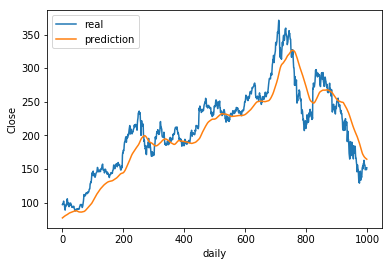

In [4]:
filename = 'lstmpredicter.h5'
lp = LSTMpredictor(interval = "daily", n_prev = 100, verbose_plot = True)
goog = loaddata_yahoo('GOOGL', interval = 'daily')
backtest = lp.backtest_Model(goog, value = "Close", length = 1000, filename = filename)

## Predict future trajectory (easy, moving window)

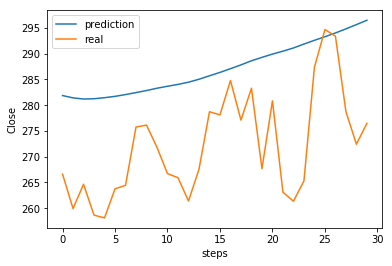

In [5]:
filename = 'lstmpredicter.h5'
lp = LSTMpredictor(interval = "daily", n_prev = 100, verbose_plot = True)
trj = loaddata_yahoo(symbol = 'FB', interval = 'daily')
pred_trj = lp.moving_test_window_preds(trj, value = "Close", n_steps = 30, filename = filename, start = len(trj)-30)

## Predict future trajectory (advanced)

step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10


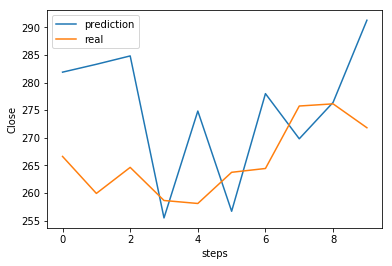

In [6]:
filename = 'lstmpredicter.h5'
lp = LSTMpredictor(interval = "daily", n_prev = 100, verbose_plot = False)
trj = loaddata_yahoo(symbol = 'FB', interval = 'daily')
start = len(trj)-30
pred_trj = lp.pred_with_fit(trj, value = "Close", n_steps = 10, filename = filename, start = start)

plt.plot(pred_trj[start:], label = "prediction")  
plt.plot(trj['Close'][start:len(pred_trj)].values, label = "real")
plt.ylabel('Close')
plt.xlabel("steps")
plt.legend(loc = "best")
plt.show()